# Descriptive Statistics and Data Visualization
This notebook covers exploratory anlysis for 430 features in the dataset
| Table Name | Variable |Description | 
| :--- | :--- | :--- | 
| Research Session Attendance|RSA |Records attendence for each week of treatment | 
| Demographics|DEM |Sex, Ethnicity, Race | 
| Urine Drug Screen| UDS  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|DSM |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|MDH |Tracks medical and psychiatric history of 24 different Conditions| 
| Physical Exam|PEX |Tracks the appearance and condition of patients for 12 different physical observations| 
| Pregnancy and Birth Control|PBC |Pregnancy test taken once per month on weeks 0, 4, 8, 12, 16, 20, 24| 
| Timeline Follow Back Survey|TFB |Surveys for self reported drug use, collected every 4 weeks, includes previous 30 days of use ot week 0, 4, 8, 12, 16, 20, 24| 
| Dose Record |DOS |Records the medication, averge weekly dose and week of treatment| 


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import helper
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('../data/merged_data.csv')

data.shape

(1917, 431)

### Review RSA Data

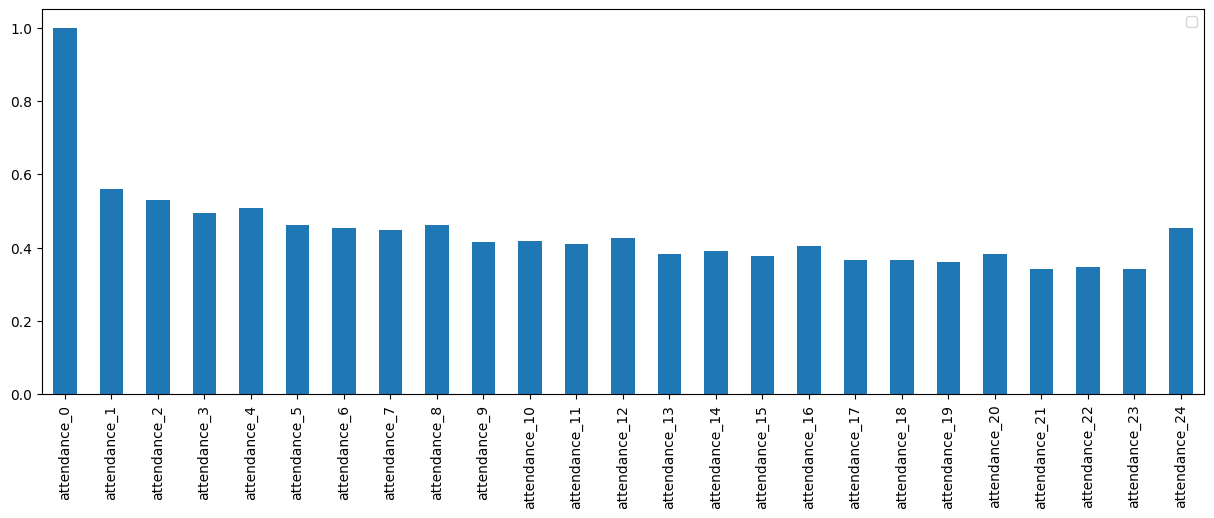

In [41]:
# review descriptive statistics

data[[col for col in data.columns if 'attendance' in col]].iloc[:,:25].describe().T[['mean']].plot(kind='bar', figsize=(15,5))
plt.legend('')

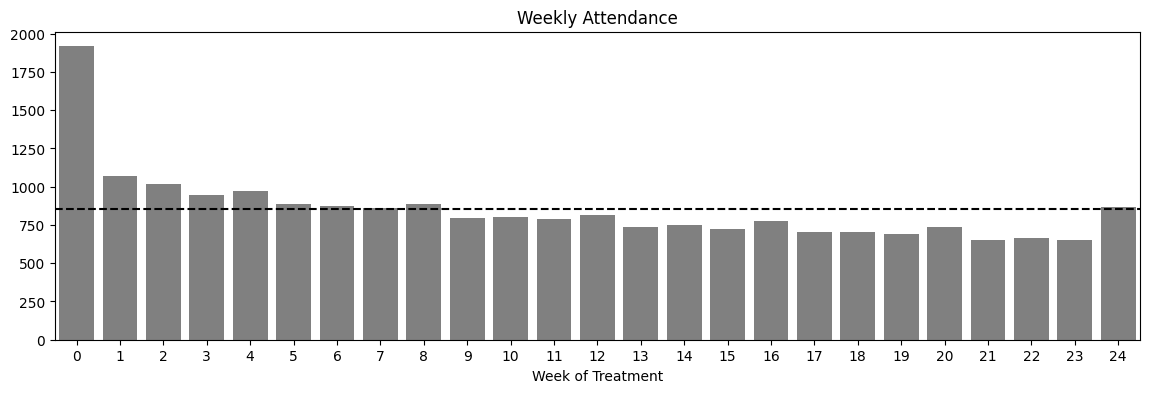

In [42]:
# call helper function to create series for rsa
rsa = helper.series_func(data, 'attendance')

# remove final column in rsa
rsa = rsa.iloc[:25]

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)

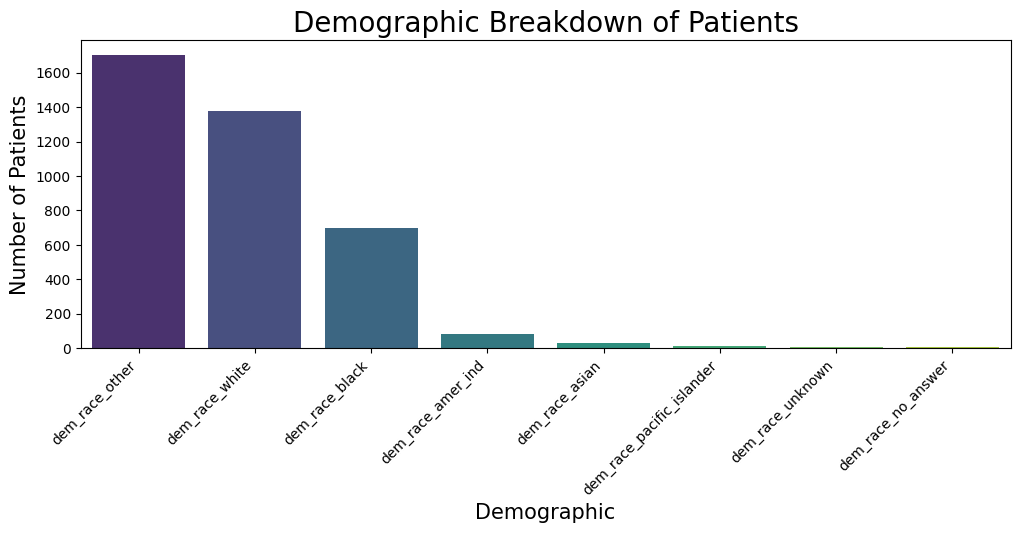

In [43]:
dem_series = (
              data[[col for col in data.columns if 'dem' in col]]
              .iloc[:,2:]
              .sum()[0:8]
              .sort_values(ascending=False)
              .to_frame('patients')
              .reset_index()
            )   

# set params to plot the data series
series, title, ylabel, xlabel = dem_series['patients'], 'Demographic Breakdown of Patients', 'Number of Patients', 'Demographic'

# call helper function to plot the data series
plt.figure(figsize=(12,4))
sns.barplot(x='index', y='patients', data=dem_series, palette='viridis')
plt.title(title, fontsize=20)
plt.ylabel(ylabel, fontsize=15)
plt.xlabel(xlabel, fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.show()


### Drug Test Dataframe
Create a dataframe with total postive tests for all drugclasses

In [44]:
# create list with different drugs to iterate through columns
drugs = ['Propoxyphene','Amphetamines','Cannabinoids','Benzodiazepines',
         'Methadone','Oxycodone','Cocaine',	'Methamphetamine','Opiate300']

# iterate through the drugs list to create a series for each drug
for test in drugs: 
    # create a new df using first 3 letters of drug name, limit first 24 columns
    globals()[f'{test}'.lower()[:3]] = data[[col for col in data.columns if test in col]].iloc[:,:25]
    # split the column names at the 2nd _ and keep the last part, which is the week number
    globals()[f'{test}'.lower()[:3]].columns = globals()[f'{test}'.lower()[:3]].columns.str.split('_').str[-1]
    # sum the columns to create the series
    globals()[f'{test}'.lower()[:3]] = globals()[f'{test}'.lower()[:3]].sum().to_frame(f'{test}'.lower()[:3])
    
# create a dataframe with the drug test results
drug_series = pd.concat([pro, amp, can, ben, met, oxy, coc, met, opi], axis=1)

drug_series

,pro,amp,can,ben,met,oxy,coc,met,opi
0,83.0,190.0,480.0,403.0,223.0,282.0,762.0,223.0,1638.0
1,772.0,822.0,1024.0,922.0,838.0,803.0,1119.0,838.0,1298.0
2,798.0,847.0,1026.0,911.0,858.0,839.0,1124.0,858.0,1238.0
3,895.0,945.0,1107.0,998.0,955.0,929.0,1199.0,955.0,1279.0
4,892.0,933.0,1124.0,992.0,947.0,919.0,1200.0,947.0,1272.0
5,951.0,1002.0,1162.0,1055.0,1014.0,983.0,1199.0,1014.0,1260.0
6,998.0,1040.0,1195.0,1129.0,1050.0,1026.0,1265.0,1050.0,1343.0
7,1022.0,1066.0,1220.0,1138.0,1075.0,1056.0,1309.0,1075.0,1346.0
8,996.0,1039.0,1193.0,1107.0,1053.0,1023.0,1257.0,1053.0,1314.0
9,1080.0,1111.0,1262.0,1181.0,1124.0,1104.0,1321.0,1124.0,1360.0


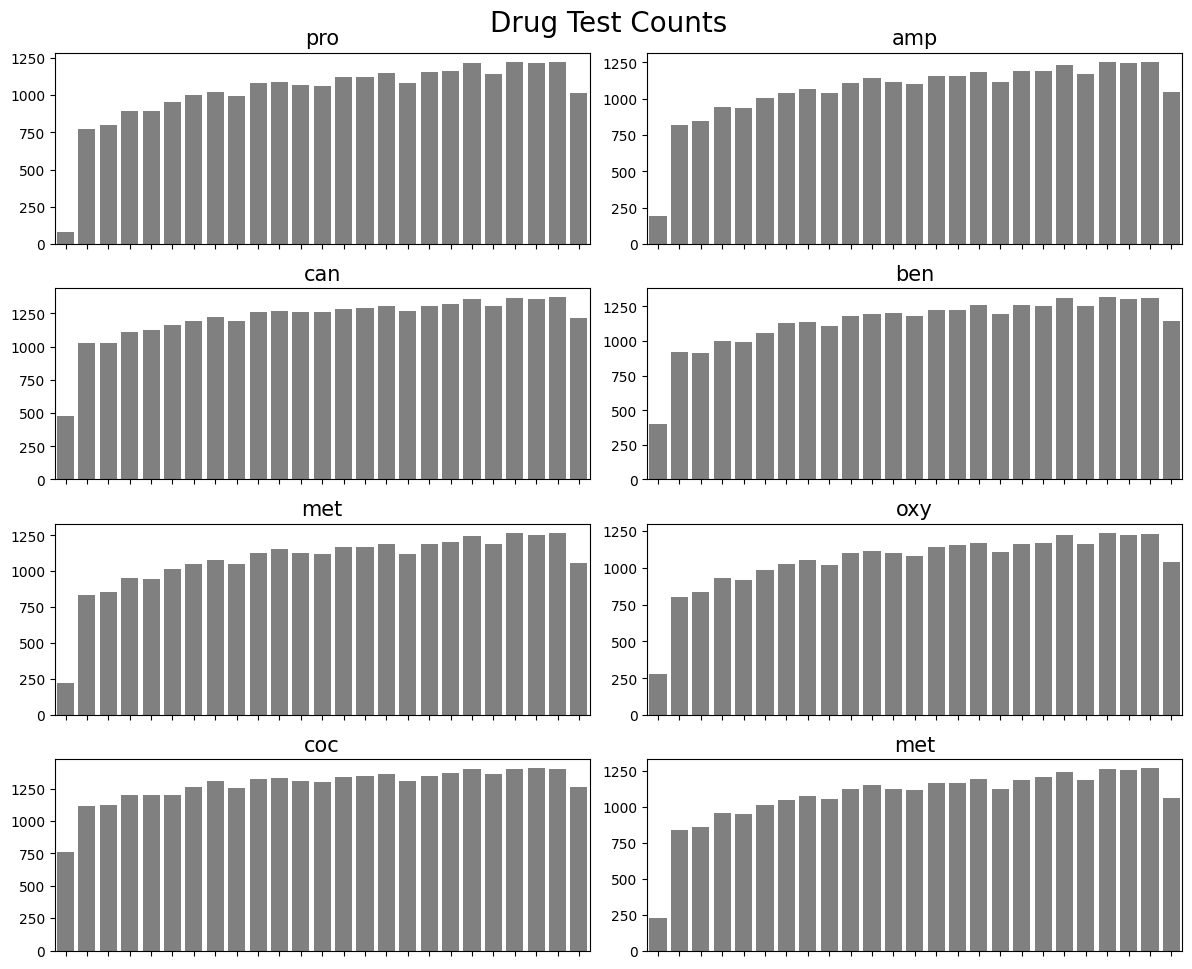

In [47]:
# set figure with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
# set main title
fig.suptitle('Drug Test Counts', fontsize=20)
# Increase hspace and wspace for more space between plots
fig.subplots_adjust(hspace=1, wspace=0.75)
fig.tight_layout()

# iterate through the axes and plot the data
for i, ax in enumerate(axes.flatten()):
    # use a barplot, with the index as the x-axis and the column as the y-axis
    sns.barplot(x=drug_series.index, y=drug_series.iloc[:,i], ax=ax, color='gray')
    # set the title for each plot
    ax.set_title(drug_series.columns[i], fontsize=15)
    ax.set_ylabel('') # remove y-axis label
    ax.set_xlabel('') # remove x-axis label
    ax.set_xticklabels([]) # remove x-axis labels